# Pymaceuticals Inc.
## Mitchell Fairgrieve
---

### Analysis:

1. The bar graph showed the Drug Regimen Capomulin has the maximum mice number, and Propriva has the smallest mice number. By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 123 female mice and 125 male mice, giving us a near perfect split (displayed by the pie charts).
---
2. The correlation between mouse weight, and average tumor volume is 0.84. This number shows that the 2 variables have a strong positive correlation. This means that when mouse weight increases average tumor volume will also increase (this can be clearly seen on the Correlation and Regression analysis and scatter plot).
---
3. By looking at the box plot of tumor volume for each treatment group, the selected treatments Capomulin and Ramicane seem to reduce the size of tumors better. Infubinol had an outlier that competed with Capomulin and Ramicane, however the bulk of the Infubinol data was much higher than the other two. This clearly shows that Capomulin and Ramicane are more effective than Infubinol and Ceftamin.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_of_mice = merged_data["Mouse ID"].nunique()
print(num_of_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data.loc[merged_data.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicated_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = merged_data.loc[merged_data["Mouse ID"] == "g989", :]
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID'].isin(duplicated_mice) == False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = clean_data["Mouse ID"].nunique()
print(num_of_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
regimen_data = clean_data.set_index(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_regimen_data = regimen_data.groupby("Drug Regimen")
regimen_mean = grouped_regimen_data["Tumor Volume (mm3)"].mean()
regimen_median = grouped_regimen_data["Tumor Volume (mm3)"].median()
regimen_var = grouped_regimen_data["Tumor Volume (mm3)"].var()
regimen_std = grouped_regimen_data["Tumor Volume (mm3)"].std()
regimen_sem = grouped_regimen_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_df  = pd.DataFrame({"Mean Tumor Volume":  regimen_mean, "Median Tumor Volume":  regimen_median,
                                    "Tumor Volume Variance":  regimen_var, "Tumor Volume Std. Dev.":  regimen_std,
                                    "Tumor Volume Std. Err.":  regimen_sem})
regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_summary_df = regimen_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_regimen_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

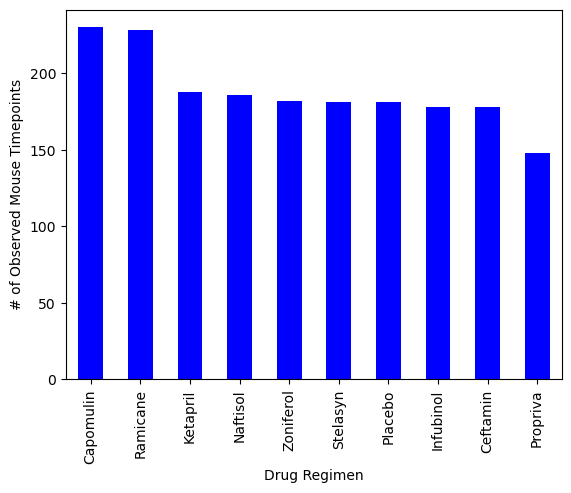

In [82]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter the DataFrame down only to those columns to chart
mice_per_drug = clean_data[["Drug Regimen","Timepoint"]]

# Calculate mouse count per drug
mice_per_drug_df = mice_per_drug["Drug Regimen"].value_counts()

# Use DataFrame.plot() in order to create a bar chart of the data (PANDAS)
mice_per_drug_df.plot(kind = "bar", color = "blue", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

plt.show()

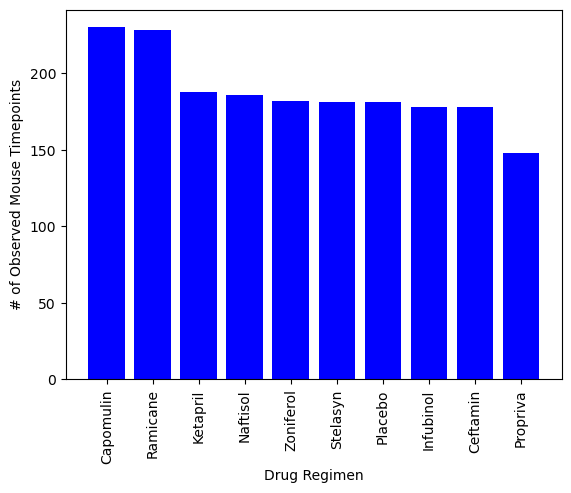

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = mice_per_drug_df.index.values
mouse_count = mice_per_drug_df.values

# Use plt.bar() in order to create a bar chart of the data (pyplot)
plt.bar(drug_regimen, mouse_count, color = "blue", align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = +90)

plt.show()

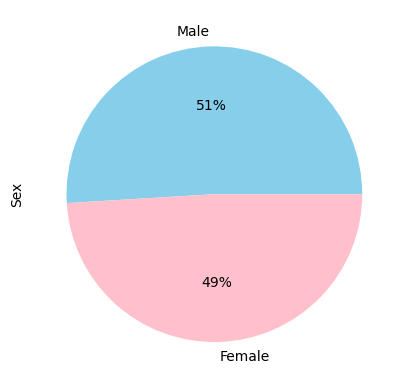

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = clean_data["Sex"].value_counts()
Sex = ["Female", "Male"]
Colors = ["skyblue", "pink"]
female_vs_male.plot(kind = "pie" , autopct = "%1.0f%%", colors = Colors, ylabel = "Sex")

plt.show()

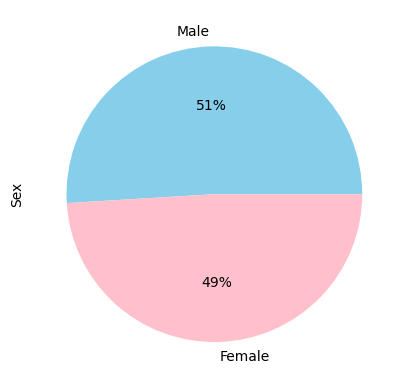

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = female_vs_male.index.values
count = female_vs_male.values
plt.ylabel("Sex")
plt.pie(count, labels = labels, colors = Colors, autopct = "%1.0f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)
greatest_timepoint_df = pd.merge(greatest_timepoint_df, clean_data, 
                                 on = ('Drug Regimen', 'Mouse ID', 'Timepoint'), how = 'left')
greatest_timepoint_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    volume_df = greatest_timepoint_df.loc[greatest_tp_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(volume_df)
    
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)
    print(f"Lower Bound for {drug} is {round(lower_bound, 2)}. Upper Bound {drug} is {round(upper_bound, 2)}.")

    # Determine outliers using upper and lower bounds & print
    for each in tumor_vol_data[0]:
        if each > upper_bound:
            print(f"Outlier: {each}")
        elif each < lower_bound:
            print(f"Outlier: {each}")


Lower Bound for Capomulin is 20.7. Upper Bound Capomulin is 51.83.
Lower Bound for Ramicane is 17.91. Upper Bound Ramicane is 54.31.
Lower Bound for Infubinol is 36.83. Upper Bound Infubinol is 82.74.
Outlier: 30.48598484
Outlier: 28.43096411
Outlier: 33.32909778
Outlier: 32.37735684
Outlier: 23.34359787
Outlier: 34.45529799
Outlier: 31.02392294
Outlier: 36.04104736
Outlier: 28.48403281
Outlier: 31.8962384
Lower Bound for Ceftamin is 25.36. Upper Bound Ceftamin is 87.67.
Outlier: 23.34359787


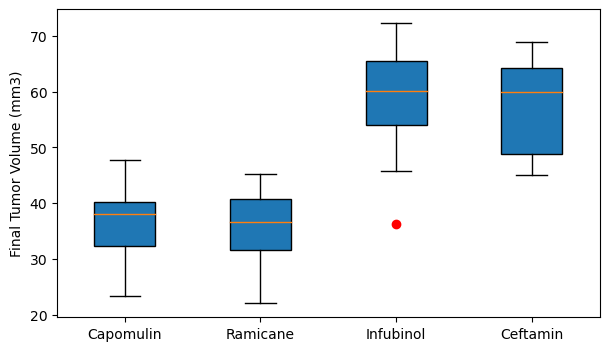

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier = dict(markerfacecolor ="r",marker = "o", markeredgecolor = "r")

fig1, ax1 = plt.subplots(figsize = (7,4))
ax1.boxplot(tumor_vol_data, flierprops = outlier, patch_artist = True)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize = 10)
ax1.xaxis.set(ticks = range(1, len(treatments) + 1), ticklabels = treatments)

plt.show()

## Line and Scatter Plots

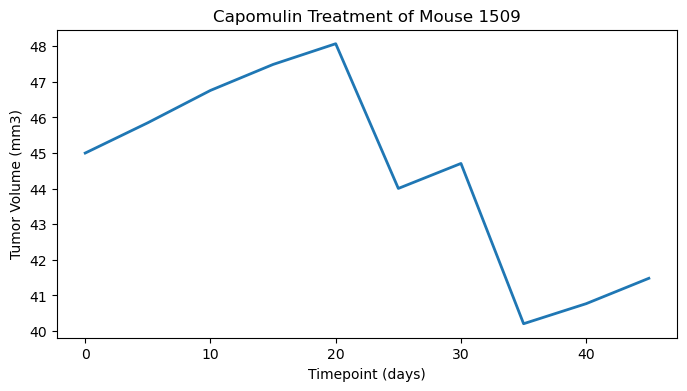

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Random Mouse (#1509)
volume_vs_time_df = clean_data.loc[clean_data["Mouse ID"] == "l509",:]
volume_vs_time_df

timepoint = volume_vs_time_df["Timepoint"]
volume = volume_vs_time_df["Tumor Volume (mm3)"] 

# Display Capomilin Treatment for Random Mouse (#1509)
plt.figure(figsize=(8,4))
line, = plt.plot(timepoint, volume, linewidth=2, markersize=12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse 1509")

plt.show()

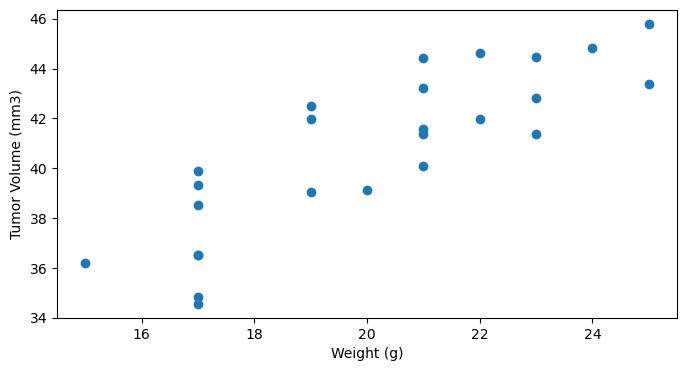

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
grouped_capomulin_df = new_capomulin_df.groupby("Mouse ID")

# Store AVG Tumor vol for each weight in the grouped Capomulin df
avg_tumor_volume = grouped_capomulin_df[("Tumor Volume (mm3)")].mean()
avg_weight = grouped_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": avg_weight, "Tumor Volume (mm3)": avg_tumor_volume})

# Display AVG Weight vs AVG Tumor Volume Scatter Plot
plt.figure(figsize = (8,4))
plt.scatter(avg_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-Value: 0.8419363424694721
P-Value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


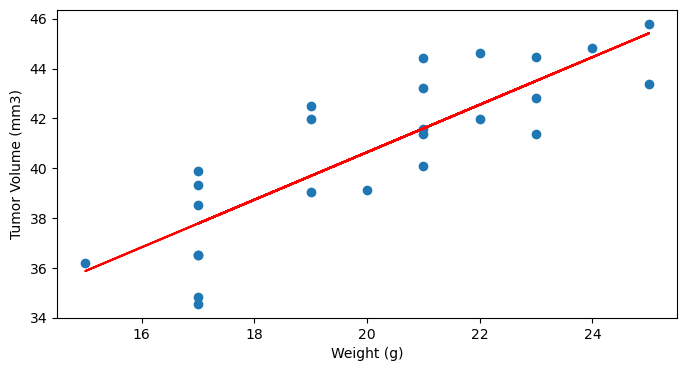

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = avg_capomulin_df["Weight (g)"]
y_values = avg_capomulin_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor_volume)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-Value: {rvalue}")
print(f"P-Value: {pvalue}")
print(f"Standard Error: {stderr}")

regress_values = x_values * slope + intercept

# Display AVG Weight vs AVG Tumor Volume Scatter Plot w/ linear regression line
plt.figure(figsize = (8,4))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()